### Decision Tree Classifier

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

RANDOM_STATE = 5

#### 1. Loading the Dataset
    Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

    People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.

    You will develop models to predict how likely a particular person is in developint cardiovascular disease, given all the information below.

    Attribute Information
    -----------------------
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
    
    Let's now load the dataset.

In [8]:
#Loading the data
data = pd.read_csv("./heart.csv")
print(f"Data shape: {data.shape}")
print(f"Feature names: {data.columns}")

Data shape: (918, 12)
Feature names: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [17]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
#Separate the target and the data
X = data.loc[:, data.columns != "HeartDisease"]
y = data["HeartDisease"]
print(f"X shape: {X.shape}")
print(f"X Features: {X.columns}")
print(f"y shape: {y.shape}")

X shape: (918, 11)
X Features: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
y shape: (918,)


    If you observe the data, we have below categorical variables and we must one-hot encode them. You must perform some data engineering before working with the models. These are 5 categorical features, so you will use Pandas to one-hot encode them.
            Sex
            ChestPainType
            RestingECG
            ExerciseAngina
            ST_Slope
#### 2. One-hot encoding using Pandas
    First you will remove the binary variables, because one-hot encoding them would do nothing to them(eg:FastingBS). To achieve this you will just count how many different values there are in each categorical variable and consider only the variables with 3 or more values.
    
    As a reminder, one-hot encoding aims to transform a categorical variable with n outputs into n binary variables.

    Pandas has a built-in method to one-hot encode variables, it is the function pd.get_dummies. There are several arguments to this function, but here you will use only a few. They are:

    data: DataFrame to be used
    prefix: A list with prefixes, so you know which value you are dealing with
    columns: the list of columns that will be one-hot encoded. 'prefix' and 'columns' must have the same length.
    For more information, you can always type help(pd.get_dummies) to read the function's full documentation.

    This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.

In [23]:
categorical_vars = ["Sex",
                    "ChestPainType",
                    "RestingECG",
                    "ExerciseAngina",
                    "ST_Slope"]

In [25]:
X = pd.get_dummies(X, prefix=categorical_vars, columns=categorical_vars)
print(X.head(2))

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0   40        140          289          0    172      0.0      0      1   
1   49        160          180          0    156      1.0      1      0   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  


In [28]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE, shuffle=True)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (734, 20)
y_train shape: (734,)
X_test shape: (184, 20)
y_test shape: (184,)


In [31]:
print(f"train samples: {len(X_train)}\ntest samples: {len(X_test)}")
print(f"target proportion: {sum(y_train) / len(y_train):.4f}")

train samples: 734
test samples: 184
target proportion: 0.5409


#### 4. Building the Models

##### 4.1 Decision Tree
    In this section, let's work with the Decision Tree you previously learned, but now using the Scikit-learn implementation.

    There are several hyperparameters in the Decision Tree object from Scikit-learn. You will use only some of them and also you will not perform feature selection nor hyperparameter tuning in this lab (but you are encouraged to do so and compare the results :-) )

    The hyperparameters you will use and investigate here is:

    min_samples_split: The minimum number of samples required to split an internal node. This may prevent overfitting.
    max_depth: The maximum depth of the tree. This may prevent overfitting.

In [34]:
min_sample_splits = [2, 10, 30, 50, 100, 200, 300, 700] # If the number is an integer, then it is the actual quantity of examples, if it is float, then it the proportion of examples from the total examples
max_depths = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

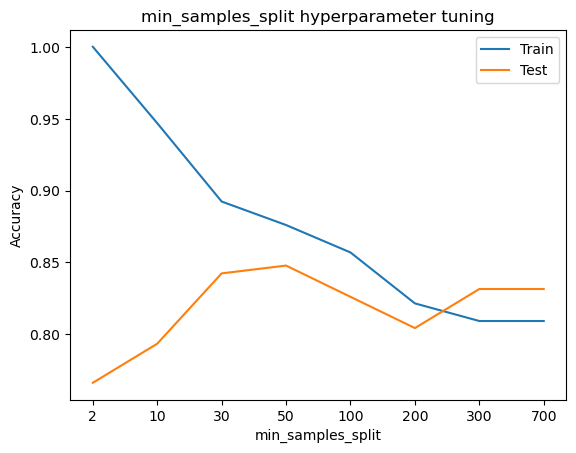

In [71]:
#min_samples_split hyper parameter tuning
acc_train_list = []
acc_test_list = []
for min_split in min_sample_splits:
    decision_tree = DecisionTreeClassifier(min_samples_split=min_split).fit(X_train, y_train)
    y_train_preds = decision_tree.predict(X_train)
    y_test_preds = decision_tree.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_preds)
    accuracy_test = accuracy_score(y_test, y_test_preds)
    acc_train_list.append(accuracy_train)
    acc_test_list.append(accuracy_test)

plt.title("min_samples_split hyperparameter tuning")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(min_sample_splits)), labels=min_sample_splits)
plt.plot(acc_train_list)
plt.plot(acc_test_list)
plt.legend(["Train", "Test"])

# fig, ax = plt.subplots(1, 1)
# ax.plot(min_sample_splits, acc_train_list, marker="o", c="b", label="Traning accuracy")
# ax.plot(min_sample_splits, acc_test_list, marker="o", c="r", label="Test accuracy")
# ax.set_title("min_samples_split hyperparameter tuning")
# ax.set_xlabel("min_samples_split"); ax.set_ylabel("Accuracy")
# # ax.set_xticks(ticks=range(len(min_sample_splits)), labels=min_sample_splits)
# optimal_accuracy_idx = np.argmax(acc_test_list)
# ax.axvline(x=min_sample_splits[optimal_accuracy_idx], c="green", lw=1, label="optimal min_samples_split")
# ax.annotate("optimal min_samples_split", xy=(min_sample_splits[optimal_accuracy_idx], 0.90), xycoords="data",
#             xytext=(10, 20), textcoords="offset points",
#             arrowprops={"arrowstyle": "simple"})
# ax.legend()
plt.show()
    

    Note how increasing the the number of min_samples_split decreases the overfit.

    Let's do the same experiment with max_depth.

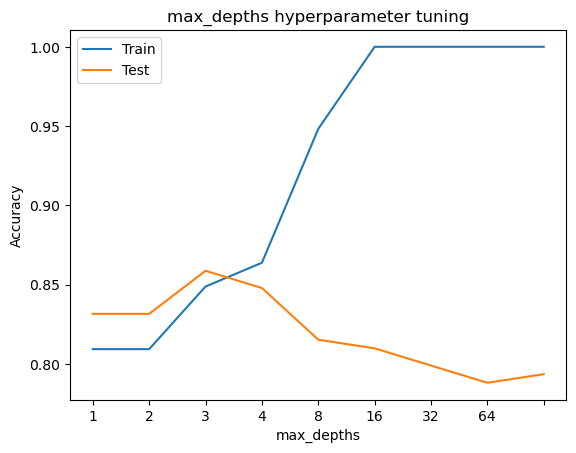

In [77]:
#max_depth hyper parameter tuning
acc_train_list = []
acc_test_list = []
for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    y_train_preds = decision_tree.predict(X_train)
    y_test_preds = decision_tree.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_preds)
    accuracy_test = accuracy_score(y_test, y_test_preds)
    acc_train_list.append(accuracy_train)
    acc_test_list.append(accuracy_test)
    
# fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# ax.plot(max_depths, acc_train_list, marker="o", c="b", label="Traning accuracy")
# ax.plot(max_depths, acc_test_list, marker="o", c="r", label="Test accuracy")
# ax.set_title("max_depths hyperparameter tuning")
# ax.set_xlabel("max_depths"); ax.set_ylabel("Accuracy")
# optimal_accuracy_idx = np.argmax(acc_test_list)
# ax.axvline(x=max_depths[optimal_accuracy_idx], c="green", lw=1, label="optimal max_depth")
# ax.annotate("optimal max_depth", xy=(max_depths[optimal_accuracy_idx], 0.90), xycoords="data",
#             xytext=(10, 20), textcoords="offset points",
#             arrowprops={"arrowstyle": "simple"})
# ax.legend()
plt.title("max_depths hyperparameter tuning")
plt.xlabel("max_depths")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(max_depths)), labels=max_depths)
plt.plot(acc_train_list)
plt.plot(acc_test_list)
plt.legend(["Train", "Test"])
plt.show()

    The test accuracy reaches the highest at tree_depth=3. When the allowed depth is smaller, the tree cannot make enough splits to distinguish positives from negatives (having the underfit problem), but when the allowed depth is too high ( >= 5), the tree becomes too specialized to the training set and thus losing accuracy to the test dataset (having the overfit problem). Our final tree model then will have:

        max_depth = 3
        min_samples_split = 50

In [73]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=50, max_depth=3, random_state=RANDOM_STATE).fit(X_train, y_train)

In [76]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train), y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.8488
Metrics test:
	Accuracy score: 0.8587


    No sign of overfit, even though the metrics are not that good.

### 4.2 Random Forest
    Now let's try the Random Forest algorithm also, using the Scikit-learn implementation. Naturally, all of the above hyperparameters will exist in this algorithm, since it is just an ensemble of Decision Trees, but will have another hyperparameter that you will use, called n_estimators which is how many different Decision Trees will be fitted.

    Remember that for a Random Forest, you use a subset of the features AND a subset of the training set to train each tree, chosen randomly. In this case, you will use the number of features as you saw in the lecture, which is sqrt(n) where n is the number of features. However, this can be modified. For further information on the Random Forest hyperparameters, you can run help(RandomForestClassifier).

    Another parameter that does not impact on the final result but can speed up the computation is called n_jobs. Since the fitting of each tree is independent of each other, it is possible to run parallel fits. So setting n_jobs higher will increase how many CPU cores it will use. Note that the numbers very close to the maximum cores of your CPU may impact on the overall performance of your PC and even lead to freezes.

    You will run the same script again, but with another parameter, n_estimators, where we will choose between 10, 50, and 100. The default is 100.

In [86]:
from sklearn.ensemble import RandomForestClassifier

min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10, 50, 100, 500]

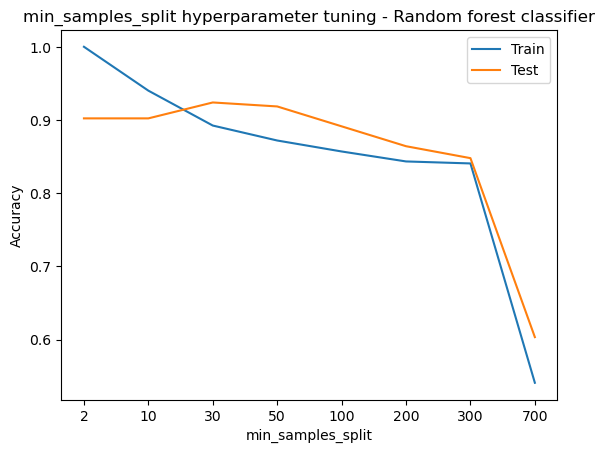

In [90]:
#min_samples_split hyper parameter tuning
acc_train_list = []
acc_test_list = []
for min_split in min_sample_splits:
    random_forest = RandomForestClassifier(min_samples_split=min_split, random_state=RANDOM_STATE).fit(X_train, y_train)
    y_train_preds = random_forest.predict(X_train)
    y_test_preds = random_forest.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_preds)
    accuracy_test = accuracy_score(y_test, y_test_preds)
    acc_train_list.append(accuracy_train)
    acc_test_list.append(accuracy_test)

plt.title("min_samples_split hyperparameter tuning - Random forest classifier")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(min_sample_splits)), labels=min_sample_splits)
plt.plot(acc_train_list)
plt.plot(acc_test_list)
plt.legend(["Train", "Test"])
plt.show()

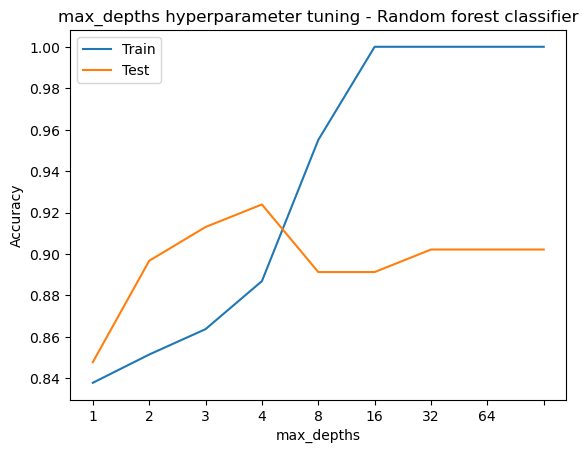

In [84]:
#max_depth hyper parameter tuning
acc_train_list = []
acc_test_list = []
for max_depth in max_depths:
    random_forest = RandomForestClassifier(max_depth=max_depth, random_state=RANDOM_STATE).fit(X_train, y_train)
    y_train_preds = random_forest.predict(X_train)
    y_test_preds = random_forest.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_preds)
    accuracy_test = accuracy_score(y_test, y_test_preds)
    acc_train_list.append(accuracy_train)
    acc_test_list.append(accuracy_test)
    
plt.title("max_depths hyperparameter tuning - Random forest classifier")
plt.xlabel("max_depths")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(max_depths)), labels=max_depths)
plt.plot(acc_train_list)
plt.plot(acc_test_list)
plt.legend(["Train", "Test"])
plt.show()

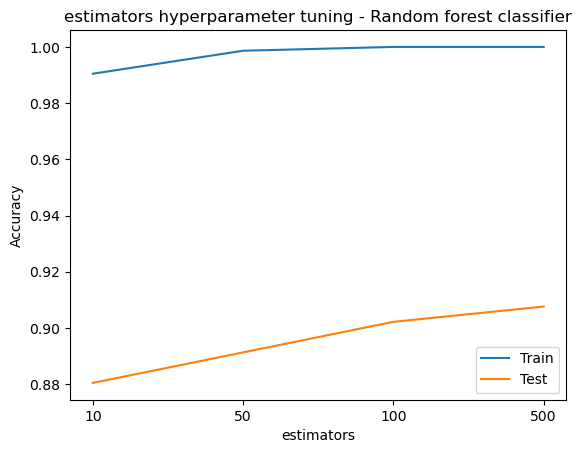

In [91]:
#max_depth hyper parameter tuning
acc_train_list = []
acc_test_list = []
for estimator in n_estimators_list:
    random_forest = RandomForestClassifier(n_estimators=estimator, random_state=RANDOM_STATE).fit(X_train, y_train)
    y_train_preds = random_forest.predict(X_train)
    y_test_preds = random_forest.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_preds)
    accuracy_test = accuracy_score(y_test, y_test_preds)
    acc_train_list.append(accuracy_train)
    acc_test_list.append(accuracy_test)
    
plt.title("estimators hyperparameter tuning - Random forest classifier")
plt.xlabel("estimators")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(acc_train_list)
plt.plot(acc_test_list)
plt.legend(["Train", "Test"])
plt.show()

    Let's then fit a random forest with the following parameters:

        max_depth: 4
        min_samples_split: 30
        n_estimators: 100

In [92]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=30, n_jobs=-1, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=30, n_jobs=-1,
                       random_state=5)

In [93]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model_rf.predict(X_train), y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(model_rf.predict(X_test), y_test):.4f}") 

Metrics train:
	Accuracy score: 0.8747
Metrics test:
	Accuracy score: 0.9130


    You have demonstrated how to look for the best value hyperparameter-by-hyperparameter. However, you should not overlook that as we experiment with one hyperparameter we always have to fix the others at some default values. This makes us only able to tell how the hyperparameter value changes with respect to those defaults. In princple, if you have 4 values to try out in each of the 3 hyperparameters being tuned, you should have a total of 4 x 4 x 4 = 64 combinations, however, the way you are doing will only give us 4 + 4 + 4 = 12 results. To try out all combinations, you can use a sklearn implementation called "GridSearchCV",  moreover, it has a refit parameter that will automatically refit a model on the best combination so you will not need to program it explicitly. For more on GridSearchCV, please refer to its documentation.
    
### 4.3 XGBoost
    Now, the last model you will test in this lab is the Gradient Boosting model, called XGBoost. As you've seen in the lectures, the boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fitted subsequently to minimize the error. XGBoost uses Boosting technique where the subsequent tree learns from previous tree misclassifications. This is done so by adding more weight to the training examples that had been misclassified earlier so that those particular examples will get more likely to be picked up more often than others during sampling with replacement.Note, we are not performin randomised features here. Only subsampling. But XGBoost internally imposes randomization to avoid collinearity of having trees with same root nodes or similar decision nodes.

    The parameters that this model comprises is the same as the parameters for any decision tree, plus some others, such as the learning rate, which is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

    One interesting thing about the XGBoost is that it allows, during the fit, to pass a list of evaluation datasets of the form (X_val ,y_val), where on each iteration, it measures the cost (or evaluation metric) on the evaluation datasets so that once the cost (or metric) stops to decrease for a number of rounds (called early_stopping_rounds), the training will stop. This is how we can automatically control how many estimators is enough, and how we can avoid overfitting due to too many estimators.

    First, let's define a subset of our training set (we should not use the test set here).
    
    Ref of Gradient Boosting: https://www.youtube.com/watch?v=3CC4N4z3GJc&t=1s 

In [96]:
from xgboost import XGBClassifier
n = int(len(X_train) * 0.8) #taking 80% of data

X_train_fit, X_val, y_train_fit, y_val = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [97]:
model_XGB = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE)
model_XGB.fit(X_train_fit, y_train_fit, eval_set=[(X_val, y_val)], early_stopping_rounds=50)

[0]	validation_0-logloss:0.63690
[1]	validation_0-logloss:0.59055
[2]	validation_0-logloss:0.55216
[3]	validation_0-logloss:0.51985
[4]	validation_0-logloss:0.49283
[5]	validation_0-logloss:0.47178
[6]	validation_0-logloss:0.45097
[7]	validation_0-logloss:0.43524
[8]	validation_0-logloss:0.41964
[9]	validation_0-logloss:0.40496
[10]	validation_0-logloss:0.39386
[11]	validation_0-logloss:0.38588
[12]	validation_0-logloss:0.37604
[13]	validation_0-logloss:0.36671
[14]	validation_0-logloss:0.35751
[15]	validation_0-logloss:0.34989
[16]	validation_0-logloss:0.34142
[17]	validation_0-logloss:0.33521
[18]	validation_0-logloss:0.33088
[19]	validation_0-logloss:0.32676
[20]	validation_0-logloss:0.32348
[21]	validation_0-logloss:0.31835
[22]	validation_0-logloss:0.31419
[23]	validation_0-logloss:0.30993
[24]	validation_0-logloss:0.30751
[25]	validation_0-logloss:0.30662
[26]	validation_0-logloss:0.30499
[27]	validation_0-logloss:0.30451
[28]	validation_0-logloss:0.30447
[29]	validation_0-loglos

C:\Users\malla\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-logloss:0.30200
[53]	validation_0-logloss:0.30140
[54]	validation_0-logloss:0.30142
[55]	validation_0-logloss:0.30252
[56]	validation_0-logloss:0.30381
[57]	validation_0-logloss:0.30449
[58]	validation_0-logloss:0.30446
[59]	validation_0-logloss:0.30533
[60]	validation_0-logloss:0.30539
[61]	validation_0-logloss:0.30717
[62]	validation_0-logloss:0.30766
[63]	validation_0-logloss:0.30895
[64]	validation_0-logloss:0.31001
[65]	validation_0-logloss:0.30824
[66]	validation_0-logloss:0.30969
[67]	validation_0-logloss:0.30963
[68]	validation_0-logloss:0.30978
[69]	validation_0-logloss:0.30896
[70]	validation_0-logloss:0.30748
[71]	validation_0-logloss:0.30696
[72]	validation_0-logloss:0.30776
[73]	validation_0-logloss:0.30791
[74]	validation_0-logloss:0.30836
[75]	validation_0-logloss:0.30791
[76]	validation_0-logloss:0.30769
[77]	validation_0-logloss:0.30833
[78]	validation_0-logloss:0.30891
[79]	validation_0-logloss:0.30947
[80]	validation_0-logloss:0.30974
[81]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=5, ...)

     Here we must pass a list to the eval_set, because you can have several different tuples of eval sets. The parameter early_stopping_rounds is the number of iterations that it will wait to check if the cost function decreased or not. If not, it will stop and get the iteration that returned the lowest metric on the eval set.

In [98]:
model_XGB.best_iteration

41

In [100]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model_XGB.predict(X_train), y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(model_XGB.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.9564
Metrics test:
	Accuracy score: 0.8967


    You can see that RandomForest achieved the best accuracy, but the results overall were close. And note that we got a very close test metric with XGBoost compared to RandomForest, and we didn't even performed any hyperparameter search! The advantage of XGBoost is that it is faster than the Random Forest and also it has more parameters, therefore you are able to fine-tune the model to achieve even better results.
    
    Ref: https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502#:~:text=Gradient%20boosting%20is%20one%20of%20the%20variants%20of%20ensemble%20methods,better%20performance%20as%20a%20whole.